# 1. 全家族鉴别器打分

## 1.1 随机选取生成序列，用作鉴别器打分

In [4]:
# 将txt文件转化为鉴别器可以处理的类型
# 具体做法是，遍历5个溶菌酶家族：
# p=0.25时，随机选择data_size条数据；p=0.5时，随机选择data_size条数据；p=0.75时，随机选择data_size条数据
# 最后整合输出到txt文件
import pandas as pd

family_list = ['PF00959','PF01832', 'PF05838', 'PF06737','PF16754']
# family_list = ['PF00959']
family_dict = {'PF00959':0, 'PF01832':1, 'PF05838':2, 'PF06737':3,'PF16754':4}
# 输入和输出文件路径
type_ = "lora"
version = "16"
data_size = 5000    # 每个p的数据量
p_list = [0.25,0.5,0.75]
# p_list = [0.5]
txt_input_dir = "../pro-gen_generate/data"
txt_output_dir = "../discriminators/data_score/"+type_+"_generation/unscored/"

# for fn in family_list:  # 遍历5个溶菌酶家族
#     # 创建一个空的 DataFrame
#     df_all = pd.DataFrame()
#     # 当前家族的输出路径
#     output_filename = txt_output_dir+ type_+ "_" + fn+"_select"+str(data_size)+".txt"

#     for p in p_list:    # 遍历p值
#         code = family_dict[fn]
#         filename = txt_input_dir+"/"+version+"_samples_"+type_+"_code_"+str(code)+"_"+str(p)+".txt"
#         # 读取当前p值的数据
#         print(f"读取家族{fn}的p={p}的数据："+filename)
#         df = pd.read_csv(filename, header=None, names=['sequence', 'score'])
#         # 将 df_top 添加到 df_all 中
#         df_all = pd.concat([df_all, df])
    
#     # 删除 'sequence' 列中长度大于510的项
#     df_limit = df_all[df_all['sequence'].apply(lambda x: len(x) <= 510)]
    

    
    # # 选择score排名前data_size的数据
    # # 将 'score' 列转换为浮点数
    # df_limit['score'] = df_limit['score'].astype(float)
    # # 删除 'sequence' 列中的重复项
    # df_unique = df_limit.drop_duplicates(subset='sequence')
    # print(f'删除重复项后的数据量：{df_unique.shape[0]}, data_size={data_size}')
    # if df_unique.shape[0] < data_size:
    #     print(f"家族{fn}去重后的数据量不足{data_size}，只有{df_unique.shape[0]}个数据，请修改data_size")
    #     exit(0)
    # # 按 'score' 列排序
    # df_sorted = df_unique.sort_values(by='score', ascending=True)
    # # 选择前data_size个数据
    # df_top = df_sorted.head(data_size)

    
    # # 删除 'sequence' 列中的重复项
    # df_sorted_unique = df_limit.drop_duplicates(subset='sequence')
    # print(f'删除重复项后的数据量：{df_sorted_unique.shape[0]}, data_size={data_size}')
    # if df_sorted_unique.shape[0] < data_size:
    #     print(f"家族{fn}去重后的数据量不足{data_size}，只有{df_sorted_unique.shape[0]}个数据，请修改data_size")
    #     exit(0)
    # # 随机选择data_size个数据
    # df_top = df_sorted_unique.sample(n=data_size)
    
    # # 保存到新的txt文件
    # df_top.to_csv(output_filename, index=False, header=False)

    # print(f"家族{fn}挑选出的序列已经输出到："+output_filename, "数据量为："+str(df_top.shape[0]))


## 1.2 统计鉴别器打分情况

In [24]:
# 对生成的随机序列进行打分
!bash run_disc_score_progen.sh
!bash run_disc_score_lora.sh

--- Logging error ---
Traceback (most recent call last):
  File "/geniusland/home/xuyingjie/anaconda3/envs/progen/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/geniusland/home/xuyingjie/anaconda3/envs/progen/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/geniusland/home/xuyingjie/anaconda3/envs/progen/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/geniusland/home/xuyingjie/anaconda3/envs/progen/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not enough arguments for format string
Call stack:
  File "/geniusland/home/xuyingjie/code/discriminators/get_disc_score_simplified.py", line 690, in <module>
    main()
  File "/geniusland/home/xuyingjie/code/discriminators/get_disc_score_simplified.py", line 617, in main
    logger.warning(
Message: 'Process rank: %s, device: %s, n_gpu: %s, distr

In [5]:
# 输入：txt文件，文件内部的格式为[seq,LLscore,disc_score]
# 输出：平均鉴别器得分
import pandas as pd
family_list = ['PF00959','PF01832', 'PF05838', 'PF06737','PF16754']
progen_score_dict = {'progen_avg_score_PF00959':0,'progen_avg_score_PF01832':0,'progen_avg_score_PF05838':0,'progen_avg_score_PF06737':0,'progen_avg_score_PF16754':0}
lora_score_dict = {'lora_avg_score_PF00959':0,'lora_avg_score_PF01832':0,'lora_avg_score_PF05838':0,'lora_avg_score_PF06737':0,'lora_avg_score_PF16754':0}

In [6]:
# 计算progen人工序列得分
type_ = "progen"
input_dir = "../discriminators/data_score/"+type_+"_generation/unscored/"
print("计算progen人工序列得分")
for fn in family_list:
    input_file_name = input_dir + 'progen_'+fn+'_'+'select'+str(data_size)+'_disc_disc_disc.txt'
    # 读取txt文件，每行的内容用逗号分隔开
    df = pd.read_csv(input_file_name, names=['seq','LLscore', 'disc_score1', 'disc_score2', 'disc_score3'],delimiter=",", header=None)
    fn_score_sum = 0
    for index,row in df.iterrows():
        disc1 = row['disc_score1']
        disc2 = row['disc_score2']
        disc3 = row['disc_score3']
        sum_disc = (disc1+disc2+disc3) / 3
        fn_score_sum = fn_score_sum + sum_disc
    # 通过字符串获取所需要的变量
    fn_avg_score_name = 'progen_avg_score_'+fn
    # 计算均分
    fn_avg_score = fn_score_sum / data_size
    progen_score_dict[fn_avg_score_name] = fn_avg_score
    # print(fn_avg_score)
    # print(f'{fn} disc sum score:  {fn_score_sum}')
    print(f'{fn}_{data_size} disc avg score:  {fn_avg_score}, 检查：{progen_score_dict[fn_avg_score_name]}')



计算progen人工序列得分
PF00959_5000 disc avg score:  0.5463593137787781, 检查：0.5463593137787781
PF01832_5000 disc avg score:  0.6501950813712681, 检查：0.6501950813712681
PF05838_5000 disc avg score:  0.5518534742926239, 检查：0.5518534742926239
PF06737_5000 disc avg score:  0.6213922628064078, 检查：0.6213922628064078
PF16754_5000 disc avg score:  0.5701042304386502, 检查：0.5701042304386502


In [7]:
print('计算lora人工序列得分')
type_ = "lora"
input_dir = "../discriminators/data_score/"+type_+"_generation/unscored/"
for fn in family_list:
    input_file_name = input_dir + 'lora_'+fn+'_'+'select'+str(data_size)+'_disc_disc_disc.txt'
    # 读取txt文件，每行的内容用逗号分隔开
    df = pd.read_csv(input_file_name, names=['seq','LLscore', 'disc_score1', 'disc_score2', 'disc_score3'],delimiter=",", header=None)
    fn_score_sum = 0
    for index,row in df.iterrows():
        disc1 = row['disc_score1']
        disc2 = row['disc_score2']
        disc3 = row['disc_score3']
        sum_disc = (disc1+disc2+disc3) / 3
        fn_score_sum = fn_score_sum + sum_disc
    # 通过字符串获取所需要的变量
    fn_avg_score_name = 'lora_avg_score_'+fn
    # 计算均分
    fn_avg_score = fn_score_sum / data_size
    lora_score_dict[fn_avg_score_name] = fn_avg_score
    # print(fn_avg_score)
    # print(f'{fn} disc sum score:  {fn_score_sum}')
    print(f'{fn}_{data_size} disc avg score:  {fn_avg_score}, 检查：{lora_score_dict[fn_avg_score_name]}')

计算lora人工序列得分
PF00959_5000 disc avg score:  0.5887940781142631, 检查：0.5887940781142631
PF01832_5000 disc avg score:  0.7348098926568462, 检查：0.7348098926568462
PF05838_5000 disc avg score:  0.6390295020128559, 检查：0.6390295020128559
PF06737_5000 disc avg score:  0.6632411866883132, 检查：0.6632411866883132
PF16754_5000 disc avg score:  0.6435876653381055, 检查：0.6435876653381055


In [28]:
# 将progen_score_dict和lora_score_dict写入np文件保存，方便之后的作图
import numpy as np
np.save('result_tmp/progen_score_dict.npy',progen_score_dict)
np.save('result_tmp/lora_score_dict.npy',lora_score_dict)

## 1.3 画图展示

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# 设置全局字体为times new roman和字体大小
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

x_font_size = 20
y_font_size = 20
title_font_size = 20
legend_font_size = 20

color_blue = '#389cbc'
color_orange = '#D87C7C'

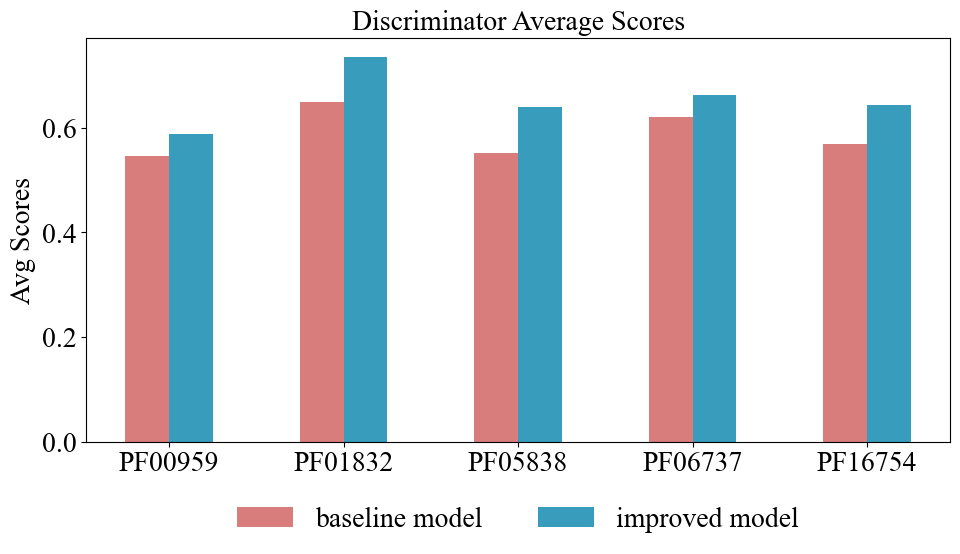

In [30]:
# 输入：来自ProGen和Lora模型的序列的disc平均分
# 输出：两者的分数比较图像

# 从上面的npy文件中读取dict数据
progen_score_dict = np.load('result_tmp/progen_score_dict.npy',allow_pickle=True).item()
lora_score_dict = np.load('result_tmp/lora_score_dict.npy',allow_pickle=True).item()

family_list = ['PF00959','PF01832', 'PF05838', 'PF06737','PF16754']
a = 'progen_avg_score_'
b = 'lora_avg_score_'
progen_score_list = np.array([progen_score_dict[a+family_list[0]], progen_score_dict[a+family_list[1]], progen_score_dict[a+family_list[2]], progen_score_dict[a+family_list[3]], progen_score_dict[a+family_list[4]]])
lora_score_list = np.array([lora_score_dict[b+family_list[0]], lora_score_dict[b+family_list[1]], lora_score_dict[b+family_list[2]], lora_score_dict[b+family_list[3]], lora_score_dict[b+family_list[4]]])

plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10, 6), tight_layout=True) # 设置输出图片大小
plt.rcParams['font.family'] = 'Times New Roman' # 设置全局字体

x = np.arange(len(family_list))  # x轴刻度标签位置
width = 0.25  # 柱子的宽度
# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
# x - width/2，x + width/2即每组数据在x轴上的位置
plt.bar(x - width/2, progen_score_list, width, label='baseline model', color=color_orange)
plt.bar(x + width/2, lora_score_list, width, label='improved model', color=color_blue)
# plt.legend(fontsize=legend_font_size) # 显示图例，设置图例字体大小
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=2, fontsize=legend_font_size, frameon=False)   # 显示图例，设置图例字体大小和图例位置
plt.title('Discriminator Average Scores', fontsize=title_font_size)    # 图标题
plt.ylabel('Avg Scores', fontsize=y_font_size)    # y轴标签
# x轴刻度标签位置不进行计算,设置 x 轴的刻度标签为 family_list
plt.xticks(x, labels=family_list, fontsize=x_font_size)
plt.show()


In [7]:
import matplotlib as mpl

default_colors = mpl.rcParams['axes.prop_cycle'].by_key()['color']
print(default_colors)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


# 2. 单家族鉴别器打分

获取模型困惑度前n的序列

In [35]:
import pandas as pd

family_dict = {'PF00959':0, 'PF01832':1, 'PF05838':2, 'PF06737':3,'PF16754':4}
# 输入和输出文件路径
type_ = "progen"
version = "4"
step_size = 2000
p_list = [0.5, 0.75]
txt_input_dir = "../pro-gen_generate/data"
txt_output_dir = "../discriminators/data_score/"+type_+"_generation/single_family/"
fn = 'PF00959'

# 创建一个空的 DataFrame
df_all = pd.DataFrame()

for p in p_list:    # 遍历p值
    code = family_dict[fn]
    filename = txt_input_dir+"/"+version+"_samples_"+type_+"_code_"+str(code)+"_"+str(p)+".txt"
    
    df = pd.read_csv(filename, header=None, names=['sequence', 'score'])
    # 将 'score' 列转换为浮点数
    df['score'] = df['score'].astype(float)
    # 删除 'sequence' 列中长度大于510的项
    df_limit = df[df['sequence'].apply(lambda x: len(x) <= 510)]
    # 对 'score' 列进行升序排序
    df_sorted = df_limit.sort_values(by='score', ascending=True)
    # 删除 'sequence' 列中的重复项
    df_sorted_unique = df_sorted.drop_duplicates(subset='sequence')
    print(f'p={p}, 删除重复项后的数据量：{df_sorted_unique.shape[0]}, step_size={step_size}')
    if df_sorted_unique.shape[0] < data_size:
        print(f"家族{fn}去重后的数据量不足{data_size}，只有{df_sorted_unique.shape[0]}个数据，请修改data_size")
        exit(0)

    # 筛选、排序、去重后的数据，合并到df_all中
    df_all = pd.concat([df_all, df_sorted_unique])

# 对合并后的 'score' 列进行升序排序
df_all_sorted = df_all.sort_values(by='score', ascending=True)
# 删除 'sequence' 列中的重复项
df__all_sorted_unique = df_all_sorted.drop_duplicates(subset='sequence')
print("总体去重后，数据量为：", df__all_sorted_unique.shape[0])
# 根据step_size，将df_all分割成多个DataFrame
for i in range(0, df__all_sorted_unique.shape[0], step_size):
    df_tmp = df__all_sorted_unique[i:i+step_size]
    output_filename = txt_output_dir+ type_+ "_" + fn+"_select"+str(step_size)+"_"+str(i)+".txt"
    df_tmp.to_csv(output_filename, index=False, header=False)
    print(f"家族{fn}挑选出的序列已经输出到："+output_filename, "数据量为："+str(df_tmp.shape[0]))


p=0.5, 删除重复项后的数据量：5986, step_size=2000
p=0.75, 删除重复项后的数据量：9083, step_size=2000
总体去重后，数据量为： 14929
家族PF00959挑选出的序列已经输出到：../discriminators/data_score/progen_generation/single_family/progen_PF00959_select2000_0.txt 数据量为：2000
家族PF00959挑选出的序列已经输出到：../discriminators/data_score/progen_generation/single_family/progen_PF00959_select2000_2000.txt 数据量为：2000
家族PF00959挑选出的序列已经输出到：../discriminators/data_score/progen_generation/single_family/progen_PF00959_select2000_4000.txt 数据量为：2000
家族PF00959挑选出的序列已经输出到：../discriminators/data_score/progen_generation/single_family/progen_PF00959_select2000_6000.txt 数据量为：2000
家族PF00959挑选出的序列已经输出到：../discriminators/data_score/progen_generation/single_family/progen_PF00959_select2000_8000.txt 数据量为：2000
家族PF00959挑选出的序列已经输出到：../discriminators/data_score/progen_generation/single_family/progen_PF00959_select2000_10000.txt 数据量为：2000
家族PF00959挑选出的序列已经输出到：../discriminators/data_score/progen_generation/single_family/progen_PF00959_select2000_12000.txt 数据量为：2000
家族PF00959挑选出的序列

利用鉴别器打分

In [37]:
!bash run_disc_score_single_family.sh

--- Logging error ---
Traceback (most recent call last):
  File "/geniusland/home/xuyingjie/anaconda3/envs/progen/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/geniusland/home/xuyingjie/anaconda3/envs/progen/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/geniusland/home/xuyingjie/anaconda3/envs/progen/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/geniusland/home/xuyingjie/anaconda3/envs/progen/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not enough arguments for format string
Call stack:
  File "/geniusland/home/xuyingjie/code/discriminators/get_disc_score_simplified.py", line 680, in <module>
    main()
  File "/geniusland/home/xuyingjie/code/discriminators/get_disc_score_simplified.py", line 607, in main
    logger.warning(
Message: 'Process rank: %s, device: %s, n_gpu: %s, distr

计算平均分

In [38]:
# 计算progen人工序列得分
step_list=[0,2000,4000,6000,8000]
type_ = "progen"
input_dir = "../discriminators/data_score/"+type_+"_generation/single_family/"
print("计算progen人工序列得分")
for step in step_list:
    input_file_name = input_dir + type_+'_'+fn+'_'+'select'+str(step_size)+'_'+str(step)+'_disc_disc_disc.txt'
    # 读取txt文件，每行的内容用逗号分隔开
    df = pd.read_csv(input_file_name, names=['seq','LLscore', 'disc_score1', 'disc_score2', 'disc_score3'],delimiter=",", header=None)
    fn_score_sum = 0
    for index,row in df.iterrows():
        disc1 = row['disc_score1']
        disc2 = row['disc_score2']
        disc3 = row['disc_score3']
        sum_disc = (disc1+disc2+disc3) / 3
        fn_score_sum = fn_score_sum + sum_disc
    # 计算均分
    fn_avg_score = fn_score_sum / step_size
    print(f'{fn}_{step} disc avg score:  {fn_avg_score}')


type_ = "lora"
input_dir = "../discriminators/data_score/"+type_+"_generation/single_family/"
print("计算lora人工序列得分")
for step in step_list:
    input_file_name = input_dir + type_+'_'+fn+'_'+'select'+str(step_size)+'_'+str(step)+'_disc_disc_disc.txt'
    # 读取txt文件，每行的内容用逗号分隔开
    df = pd.read_csv(input_file_name, names=['seq','LLscore', 'disc_score1', 'disc_score2', 'disc_score3'],delimiter=",", header=None)
    fn_score_sum = 0
    for index,row in df.iterrows():
        disc1 = row['disc_score1']
        disc2 = row['disc_score2']
        disc3 = row['disc_score3']
        sum_disc = (disc1+disc2+disc3) / 3
        fn_score_sum = fn_score_sum + sum_disc
    # 计算均分
    fn_avg_score = fn_score_sum / step_size
    print(f'{fn}_{step} disc avg score:  {fn_avg_score}')

计算progen人工序列得分
PF00959_0 disc avg score:  0.7683884416339687
PF00959_2000 disc avg score:  0.6105239925888309
PF00959_4000 disc avg score:  0.5585210934086641
PF00959_6000 disc avg score:  0.549163543482886
PF00959_8000 disc avg score:  0.5912059220863956
计算lora人工序列得分
PF00959_0 disc avg score:  0.7371109943195648
PF00959_2000 disc avg score:  0.6981579967320359
PF00959_4000 disc avg score:  0.6837155714509515
PF00959_6000 disc avg score:  0.6466244699158256
PF00959_8000 disc avg score:  0.6052861685095352


绘制折线图

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# 设置全局字体为times new roman和字体大小
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16

x_font_size = 14
y_font_size = 20
title_font_size = 20
legend_font_size = 20

color_light_blue = '#389cbc'
color_deep_blue = '#2878b5'
color_orange = '#D87C7C'

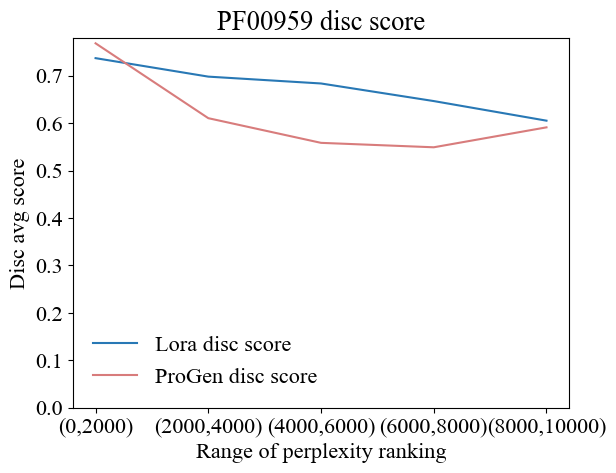

In [47]:
# 折线图
# 定义两条折线，每条折线的数据为一个列表
progen_score_top_n = [0.7683884416339687, 0.6105239925888309, 0.5585210934086641, 0.549163543482886, 0.5912059220863956]
lora_score_top_n = [0.7371109943195648, 0.6981579967320359, 0.6837155714509515, 0.6466244699158256, 0.6052861685095352]

# 创建x轴的标签
labels = ['(0,2000)', '(2000,4000)', '(4000,6000)', '(6000,8000)', '(8000,10000)']

# 创建一个figure和axes
fig, ax = plt.subplots()

# 创建两条折线
ax.plot(labels, lora_score_top_n, label='Lora disc score', color=color_deep_blue)
ax.plot(labels, progen_score_top_n, label='ProGen disc score', color=color_orange)
# ax.plot(labels, lora_score_top_n, label='Lora disc score', color='#2878b5')
# ax.plot(labels, progen_score_top_n, label='ProGen disc score')
# ax.plot(labels, lora_score_top_n, label='Lora disc score')

# 添加x轴和y轴的标签
ax.set_xlabel('Range of perplexity ranking')
ax.set_ylabel('Disc avg score')

# 添加标题
ax.set_title('PF00959 disc score')

# 添加图例，取消图例边框
ax.legend(frameon=False)

# 设置y轴的范围，从0开始
plt.ylim(bottom=0)

# 显示图形
plt.show()